# Stroke Prediction

Oleh: Aditya Atallah

dataset : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [ ]:
# memanggil library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Collection

In [ ]:
# mengimport dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# melihat ukuran data
df.shape

(5110, 12)

Data memiliki 5110 baris data dan 12 column

In [ ]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Variable Informasi**

- id: unique identifier
- gender: jenis kelamin pasien "Male", "Female" or "Other"
- age: umur pasien
- hypertension: 0 jika pasien tidak memiliki tekanan darah tinggi dan 1 jika memiliki
- heart_disease: 0 jika pasien tidak memiliki sakit jantung dan 1 jika memiliki
- ever_married: status Menikah "No" or "Yes"
- work_type: tipe perkejaan pasien "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: Tempat tinggal seorang pasien dipedasaan yaitu "Rural" atau di perkotaan "Urban"
- avg_glucose_level: rata-rata kadar gula darah dalam waktu tertentu
- bmi: ukuran body mass index pasien
- smoking_status: Status Merekok pasien "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 jika pasien memiliki stroke atau 0 jika tidak


In [ ]:
# Menghapus feature yang tidak digunakan yaitu column id
df.drop(columns='id', inplace=True)
df.columns.to_list()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [ ]:
# mengubah data types
df['age'] = df['age'].astype('int')
df['hypertension'] = df['hypertension'].astype('object')
df['Residence_type'] = df['Residence_type'].astype('object')
df['heart_disease'] = df['heart_disease'].astype('object')
df['stroke'] = df['stroke'].astype('object')

df.dtypes

gender                object
age                    int64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

In [ ]:
# melihat deskripsi statistik pada data
df.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.215264,106.147677,28.893237
std,22.633866,45.283560,7.854067
min,0.000000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


### Missing Value

In [ ]:
# pada feature Age terdapat nilai 0, sedangkan tidak ada seseorang yang berumur 0
df = df[df['age'] != 0]
print(df.shape)

(5067, 11)


In [ ]:
# melakukan pengecekan Missing Value
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  200
smoking_status         0
stroke                 0
dtype: int64

pada column bmi terdapat data yang hilang sebesar 201. Pada tahapan ini akan melakukan untuk mengatasinya melakukan penghapusan pada data yang missing

In [ ]:
# menghapus missing value
df.dropna(axis=0,inplace=True)
df.shape

(4867, 11)

In [ ]:
# mengecek data yang duplikat
duplicated = df.duplicated().sum()
print(f'Data yang duplikat berjumlah : {duplicated}')

Data yang duplikat berjumlah : 0


### Outliers

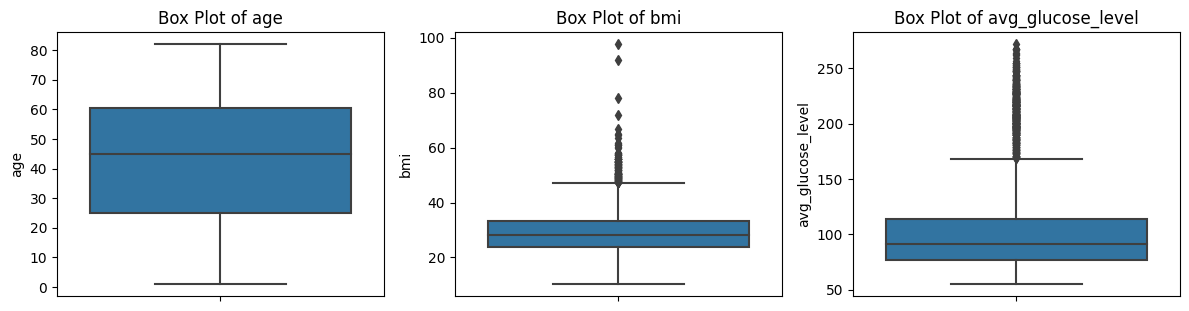

In [ ]:
num_features = ['age', 'bmi', 'avg_glucose_level']

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)


plt.tight_layout()
plt.show()

Terdapat Outliers pada feature BMI dan Avg_glucose_level, untuk mengatasi akan melakukan penghapusan pada nilai outlier

In [ ]:
# menghapus outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1


df = df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]

<ipython-input-14-aed0e19515bb>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
<ipython-input-14-aed0e19515bb>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)
<ipython-input-14-aed0e19515bb>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]


In [ ]:
df.shape

(4215, 11)

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
numerical_features = ['age','avg_glucose_level','bmi']
categorical_features = ['gender','hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4215 entries, 2 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4215 non-null   object 
 1   age                4215 non-null   int64  
 2   hypertension       4215 non-null   object 
 3   heart_disease      4215 non-null   object 
 4   ever_married       4215 non-null   object 
 5   work_type          4215 non-null   object 
 6   Residence_type     4215 non-null   object 
 7   avg_glucose_level  4215 non-null   float64
 8   bmi                4215 non-null   float64
 9   smoking_status     4215 non-null   object 
 10  stroke             4215 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 395.2+ KB


#### Categorical Features


Statistik untuk feature: gender
        jumlah sampel  persentase
Female           2513        59.6
Male             1701        40.4
Other               1         0.0


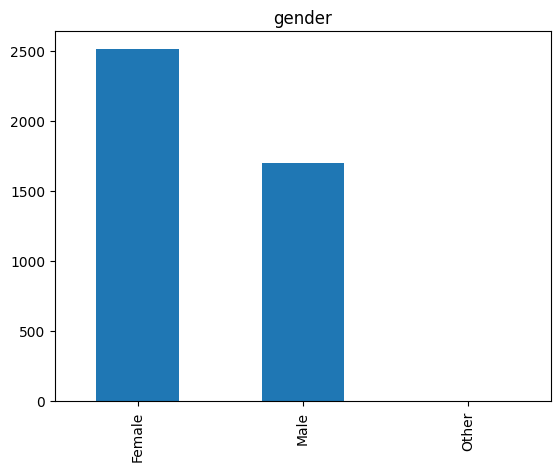




Statistik untuk feature: hypertension
   jumlah sampel  persentase
0           3923        93.1
1            292         6.9


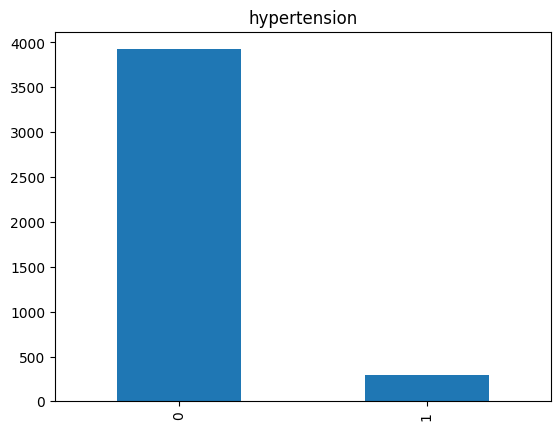




Statistik untuk feature: heart_disease
   jumlah sampel  persentase
0           4060        96.3
1            155         3.7


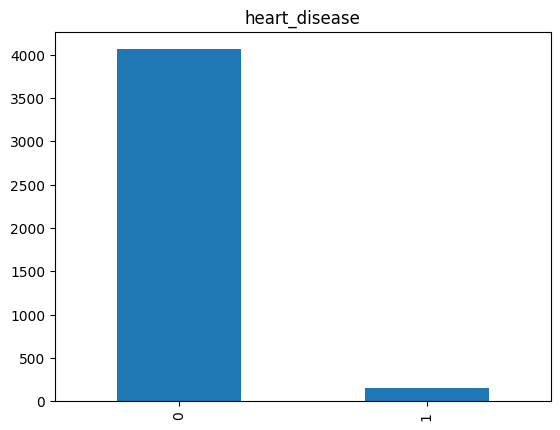




Statistik untuk feature: ever_married
     jumlah sampel  persentase
Yes           2642        62.7
No            1573        37.3


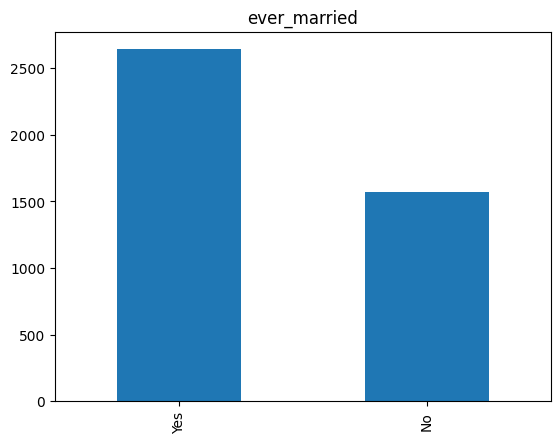




Statistik untuk feature: work_type
               jumlah sampel  persentase
Private                 2412        57.2
Self-employed            629        14.9
children                 620        14.7
Govt_job                 532        12.6
Never_worked              22         0.5


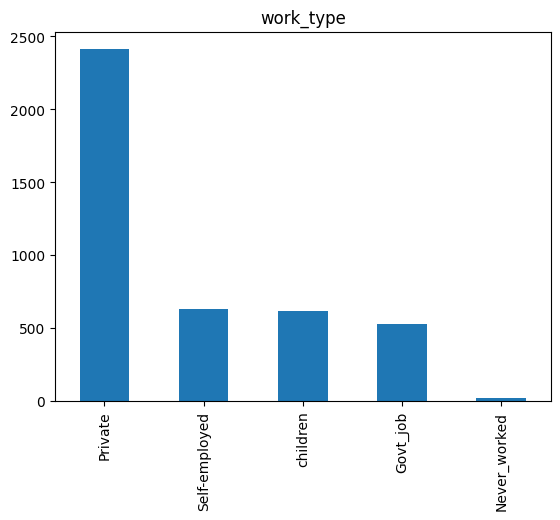




Statistik untuk feature: Residence_type
       jumlah sampel  persentase
Urban           2138        50.7
Rural           2077        49.3


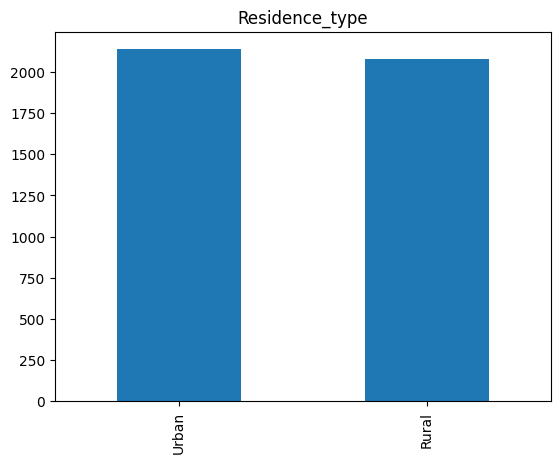




Statistik untuk feature: smoking_status
                 jumlah sampel  persentase
never smoked              1569        37.2
Unknown                   1339        31.8
formerly smoked            671        15.9
smokes                     636        15.1


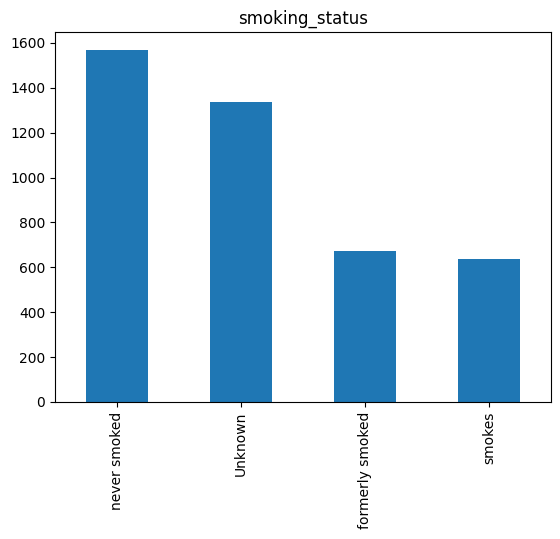




Statistik untuk feature: stroke
   jumlah sampel  persentase
0           4079        96.8
1            136         3.2


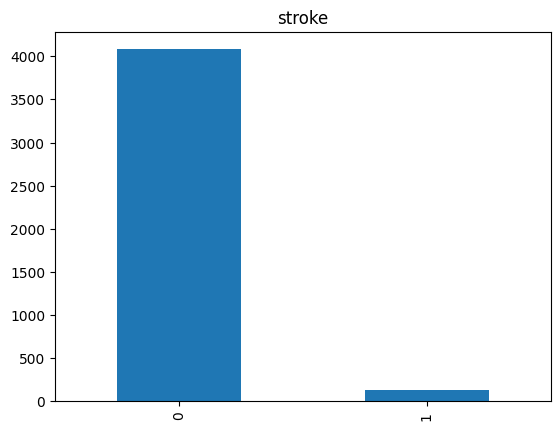

In [ ]:
for feature in categorical_features:
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    features = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
    print(f"\nStatistik untuk feature: {feature}\n{features}")
    count.plot(kind='bar', title=feature)
    plt.show()
    print('\n')


pada feature gender terdapat nilai error yaitu dimana gender bernilai other, untuk itu akan melakukan penghapusan data pada feature gender yang bernilai other

In [ ]:
# menghapus nilai error
df= df[df['gender']!='Other']
x = df.gender.value_counts()
print(x)

Female    2513
Male      1701
Name: gender, dtype: int64


#### Numerical Features

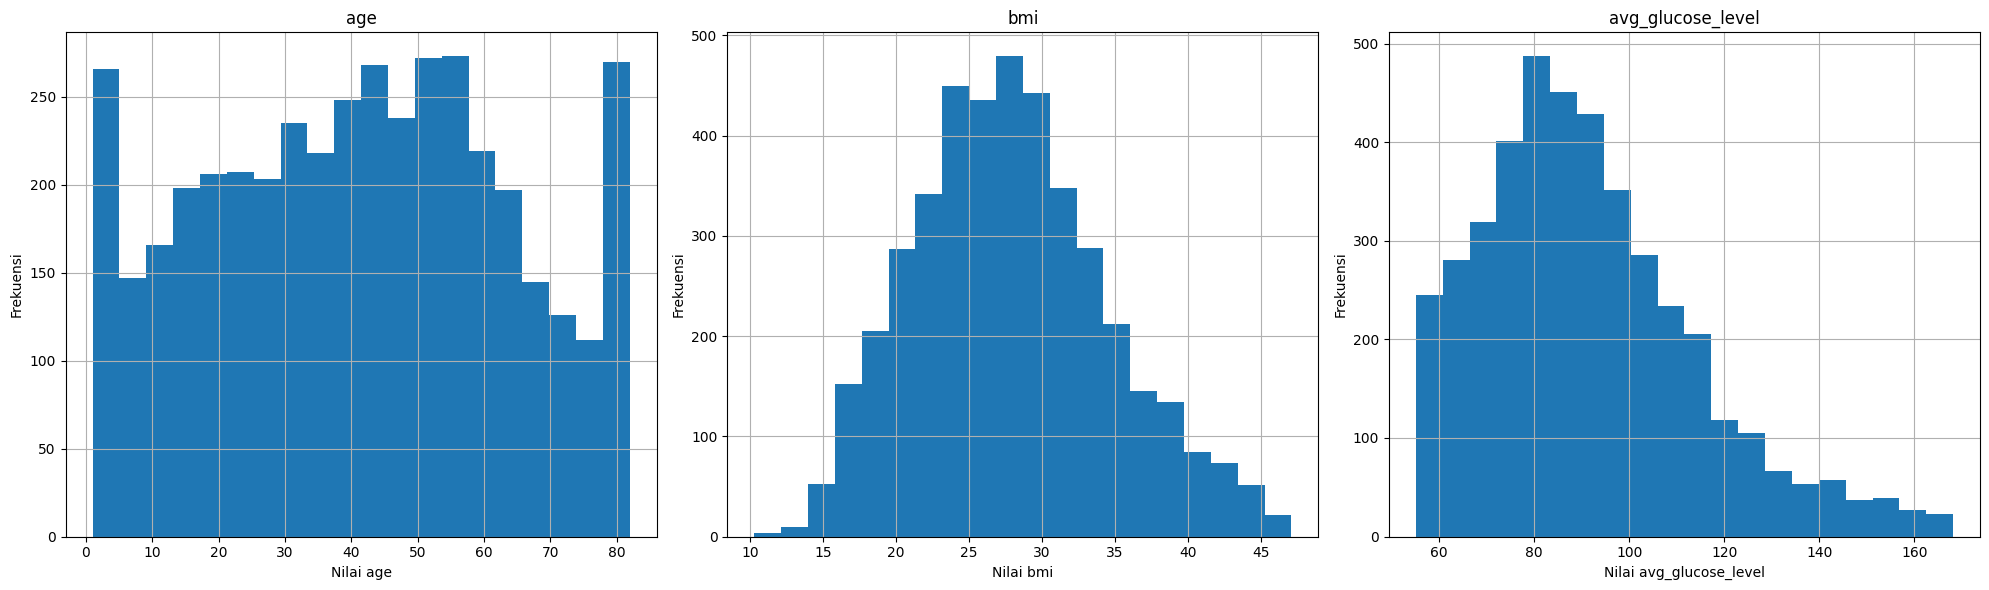

In [ ]:
fig, axes = plt.subplots(ncols=len(num_features), figsize=(20,6))

for i, column in enumerate(num_features):
    df[column].hist(ax=axes[i], bins=20)
    axes[i].set_title(column)
    axes[i].set_xlabel(f'Nilai {column}')
    axes[i].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()

pada column age dan bmi distribusi data cukup normal akan tetapi pada avg_glucose_level data miring kekanan yang mana akan berdampak pada model

### Multivariate Analysis

#### Categorical Features

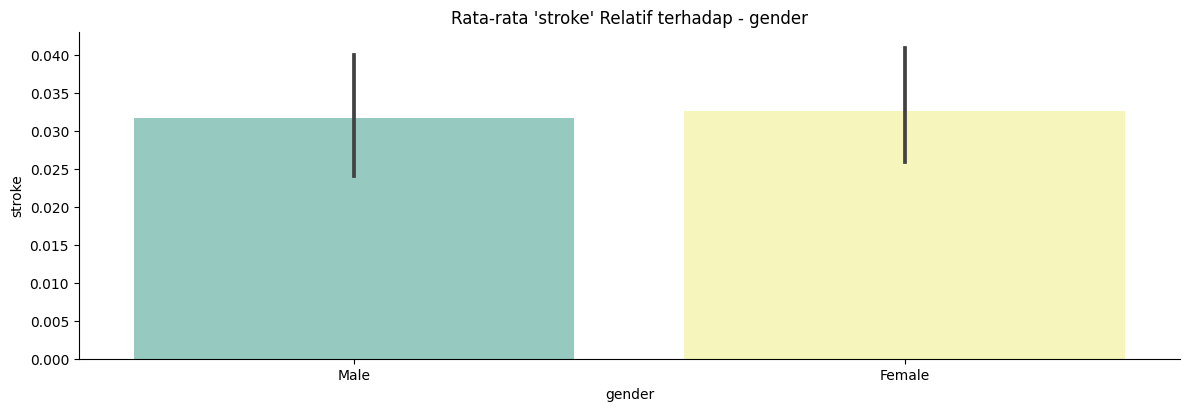

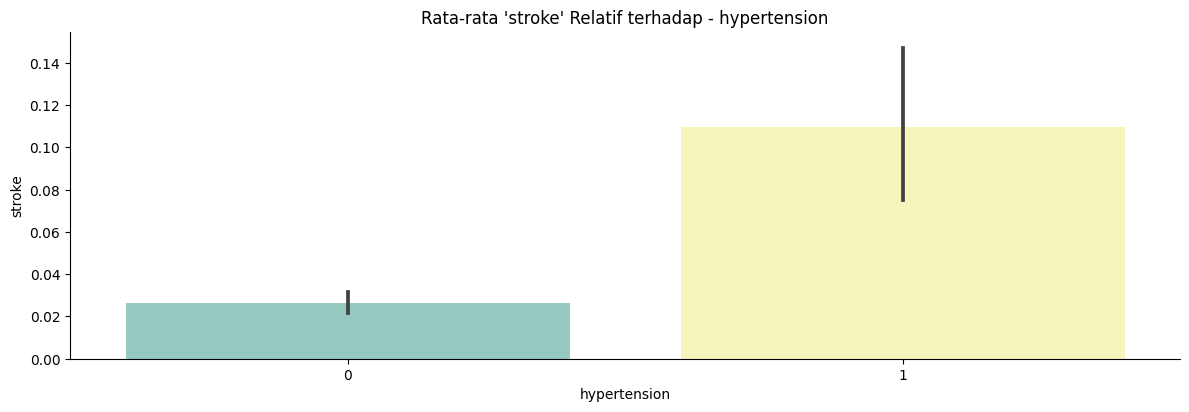

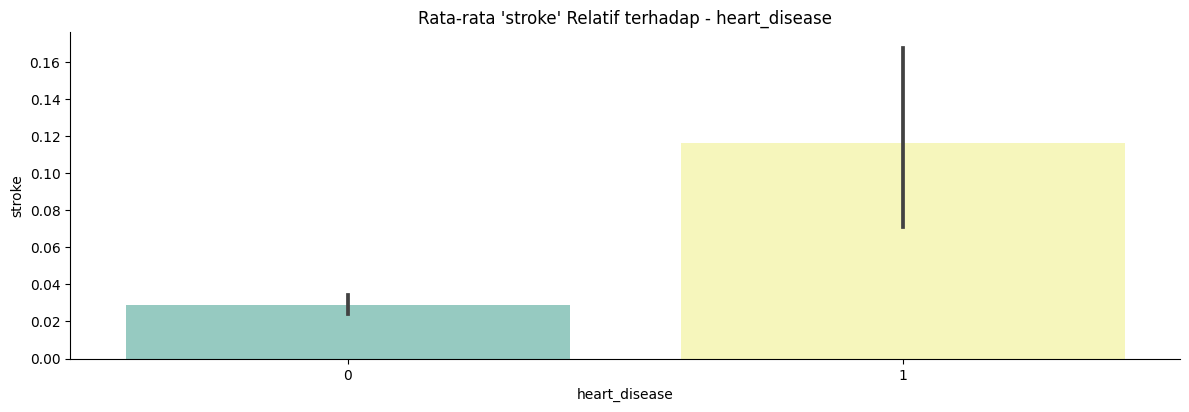

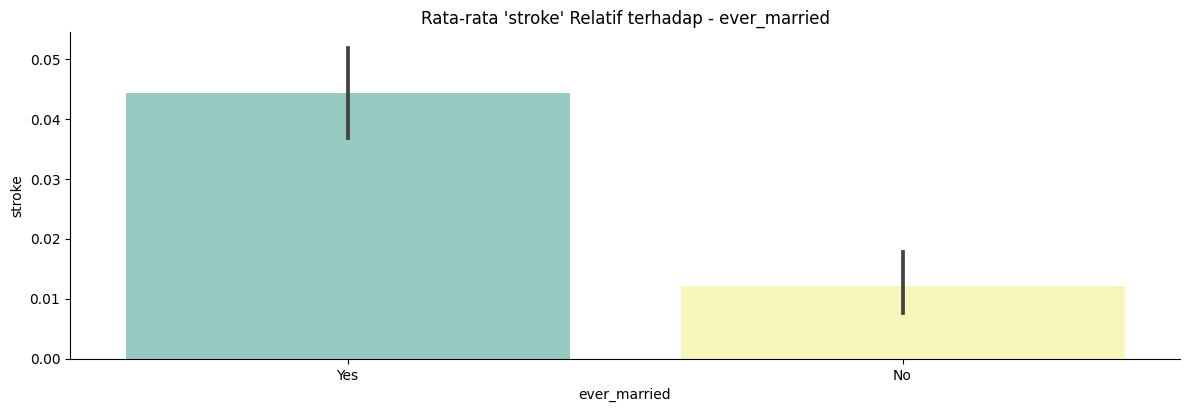

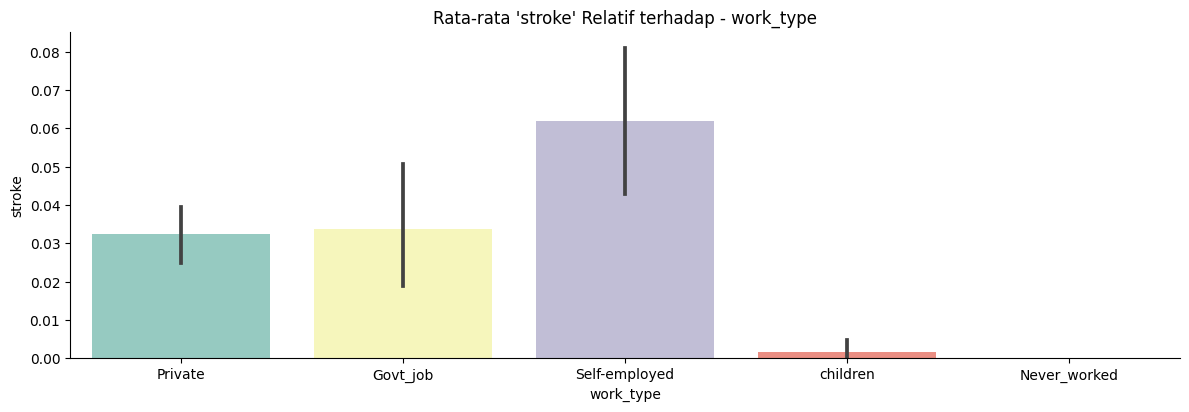

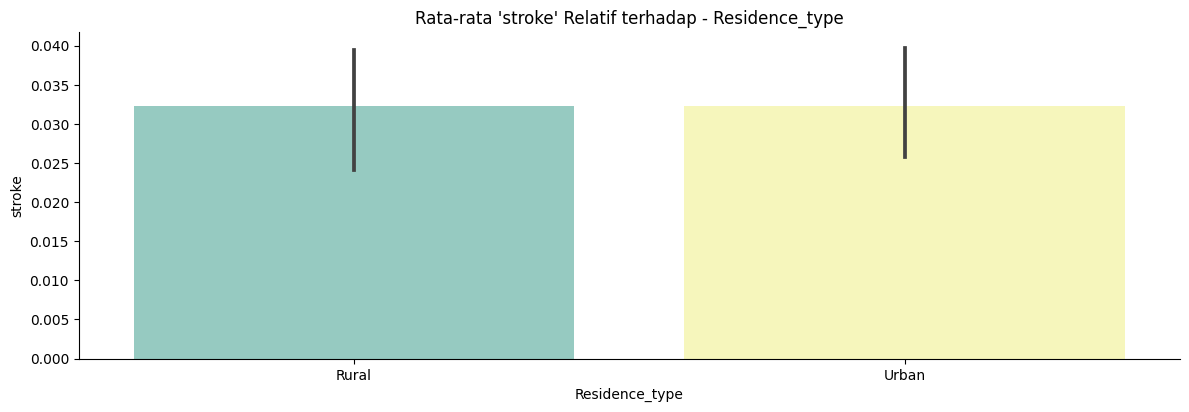

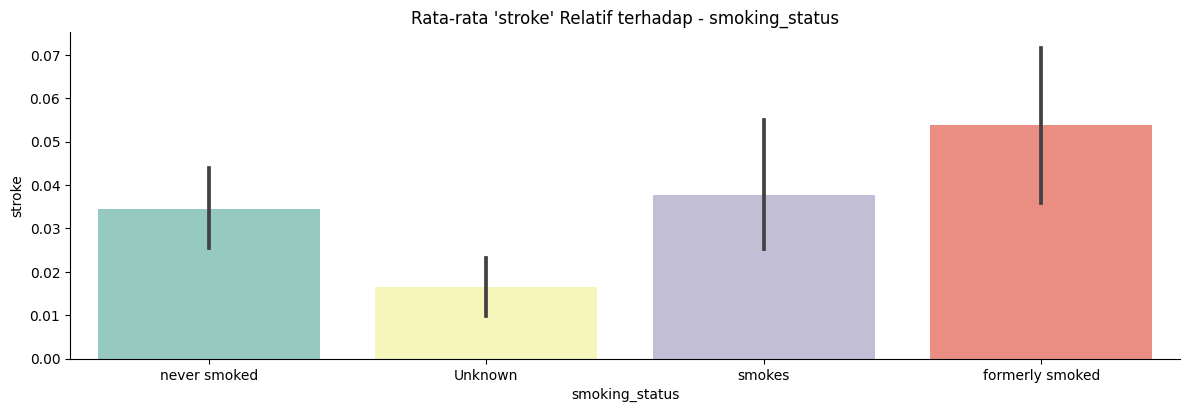

In [ ]:
cat_features = df.select_dtypes(include = 'object').columns.to_list()

for col in cat_features:
  if col != 'stroke':
    sns.catplot(data=df, x=col, y='stroke', kind='bar', dodge=False, height=4, aspect=3, palette='Set3')
    plt.title("Rata-rata 'stroke' Relatif terhadap - {}".format(col))

#### Numerical Features

<ipython-input-27-f160639e252c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

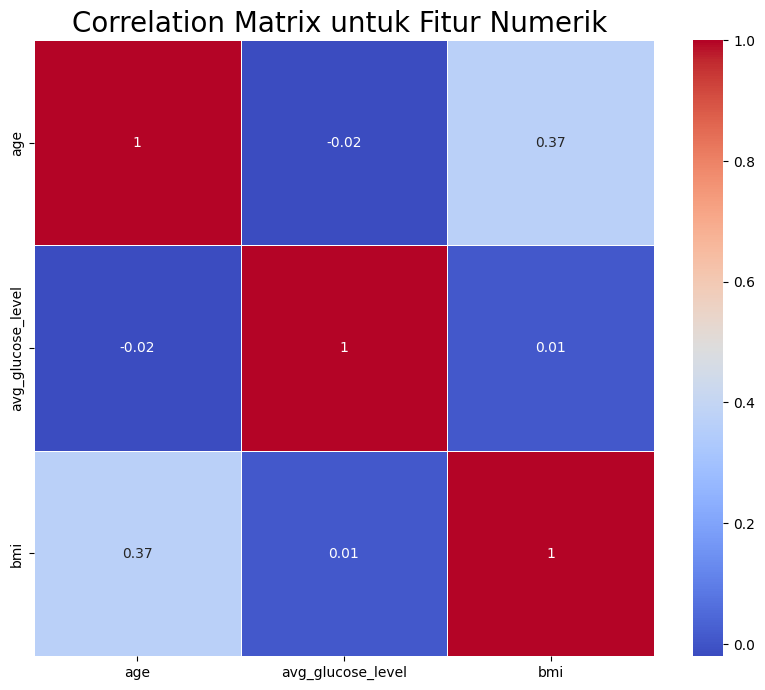

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5 )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

korelasi antar feature menunjukan arah positif, tidak ada feature yang memiliki yang sangat tinggi

## Data Preprocessing

#### One Hot Encoding Feature Categorical

In [ ]:
df = pd.get_dummies(df, columns=['hypertension','heart_disease','gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
df['stroke'] = df['stroke'].astype('int')
df.head()

<ipython-input-28-6625ba873432>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=['hypertension','heart_disease','gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
<ipython-input-28-6625ba873432>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=['hypertension','heart_disease','gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)


,age,avg_glucose_level,bmi,stroke,hypertension_1,heart_disease_1,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80,105.92,32.5,1,0,1,1,1,0,1,0,0,0,0,1,0
6,74,70.09,27.4,1,1,1,1,1,0,1,0,0,0,0,1,0
7,69,94.39,22.8,1,0,0,0,0,0,1,0,0,1,0,1,0
9,78,58.57,24.2,1,0,0,0,1,0,1,0,0,1,0,0,0
10,81,80.43,29.7,1,1,0,0,1,0,1,0,0,0,0,1,0


#### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='stroke')
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, shuffle=True
)

In [ ]:
print(f'Data Train')

Data Train


#### Standarisasi

In [ ]:
# melakukan Standarisasi pada data numerik tidak pada one-hot encoding
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_train[numerical_features].head()

,age,avg_glucose_level,bmi
1478,-0.269649,0.480286,0.961819
1601,-0.044568,-0.927721,-0.690389
2826,1.666053,-0.431894,-0.735449
3270,0.180514,-0.958186,-0.389987
4806,-1.169976,2.022515,-1.291192


## Modelling

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

#### Hyperparameter Tuning

In [ ]:
models = {
    'knn': KNeighborsClassifier(),
    'svc': SVC(),
    'rfc': RandomForestClassifier()
}

params_grid = {
    'knn': {
        'n_neighbors': [3,4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    },
    'svc': {
         'C': [0.1, 1, 10],
         'kernel': ['linear', 'rbf'],
         'gamma': [0.1, 1, 10]
    },
    'rfc': {
         'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]
    }
}

In [ ]:
scores = []
# cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.05, random_state=123)


for key, value in models.items():
  params = params_grid[key]
  gridSearch = GridSearchCV(value, params, cv=cv, return_train_score=False)
  gridSearch.fit(X_train, y_train)
  scores.append({
        'model': key,
        'best_score': gridSearch.best_score_,
        'best_params': gridSearch.best_params_
    })
result = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [ ]:
result

,model,best_score,best_params
0,knn,0.968047,{'n_neighbors': 6}
1,svc,0.968047,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}"
2,rfc,0.968047,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."


#### Modelling with Best Parameter

In [ ]:
# Model KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn_acc= knn.score(X_train,y_train)

In [ ]:
# Model SVC
svc = SVC(C=0.1, gamma=0.1, kernel='linear')
svc.fit(X_train, y_train)
svc_acc = svc.score(X_train, y_train)

In [ ]:
# Model Random Forest Classifier
rfc = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
rfc.fit(X_train, y_train)
rfc_acc= rfc.score(X_train, y_train)

In [ ]:
# Hasil model pada data train
result_model = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'KNN'],
    'Accuracy': [svc_acc, rfc_acc, knn_acc]
})
result_model

,Model,Accuracy
0,SVM,0.969149
1,Random Forest,0.999703
2,KNN,0.968852


Hasil akurasi model terbaik yaitu Random Forest Classifier

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
acc_score = pd.DataFrame(
    columns=['Train', 'Test'],
    index=['SVC', 'KNN', 'RFC']
)

model_dict = {'KNN': knn, 'RFC': rfc, 'SVC': svc}

for name, model in model_dict.items():
    acc_score.loc[name, 'Train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    acc_score.loc[name, 'Test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))



In [ ]:
acc_score

,Train,Test
SVC,0.969149,0.96204
KNN,0.968852,0.959668
RFC,0.999703,0.96204


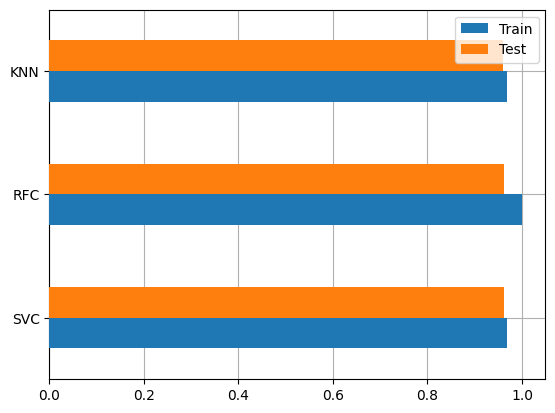

In [ ]:
fig, ax = plt.subplots()
acc_score.sort_values(by='Test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Secara keseluruhan setiap model menghasilkan Accuracy score yang sangat tinggi yaitu sekitar 0.97 dan pada data test memiliki hasil akurasi yang sama yaitu 0.969

In [ ]:
prediksi = X_test.iloc[0:5].copy()
pred_dict = {'y_true':y_test[0:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RFC,prediksi_SVC
3558,0,0,0,0
434,0,0,0,0
2396,0,0,0,0
2248,0,0,0,0
2362,0,0,0,0
